In [208]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
import scipy.interpolate
import pandas as pd

Key function we examine:

$$
f(t, a, b, c) = \sqrt{a} \cdot e^{-b \cdot t} \cdot \sin(c \cdot t) + 0.5 \cdot \cos(2 \cdot t)
$$


In [209]:
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, c)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.savefig('time_series.png')
    plt.show()

def plot_against_interpolation(a, b, c, interpolated_values, t = np.linspace(0, 1, 100)):
    f_values = f(t, a, b, c)
    # Plot values and interpolated function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.plot(t, interpolated_values, label='Interpolated', color='red', linestyle='dashed')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_ratio(f_values,interpolated_values, legend=True):
    ratio = f_values / interpolated_values
    plt.figure(figsize=(10, 6))
    plt.plot(ratio, label='Ratio of true values vs. interpolated values', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    if legend:
        plt.legend()
    plt.grid(True)
    plt.show()



# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

# Display the interactive plot
display(interactive_plot)



interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

## Question 1
Consider all parameter values (except t) are fixed and create an interpolator with respect to time (t). Use the original grid (100 t's between 0 and 1) for the interpolation.

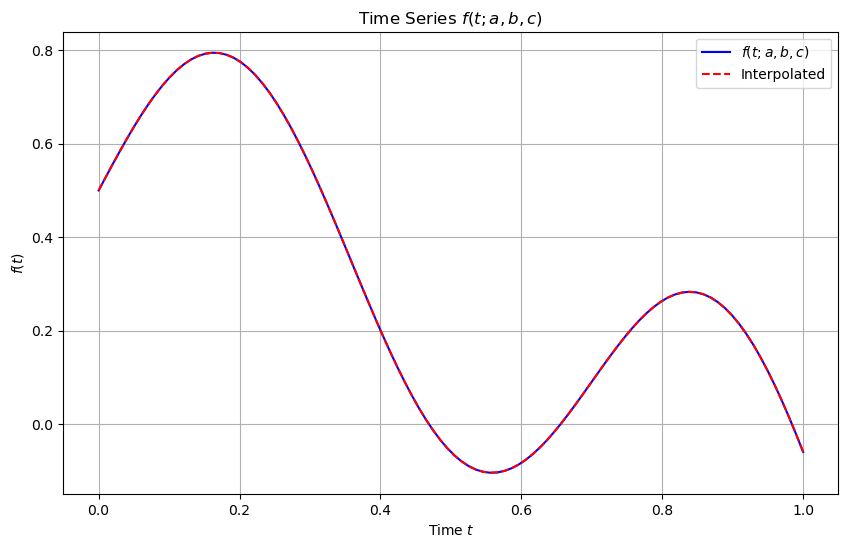

In [210]:
# We define the parameters as fixed values
a = 0.1
b = -0.13
c = 9

# We create an array of 100 t's between 0 and 1 (linear space)
t = np.linspace(0, 1, 100)

# We obtain the values of f(t) for the given parameters
f_values = f(t, a, b, c)

# We interpolate the values of f(t) using a linear interpolation
f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='linear')

# We plot the values of f(t) and the interpolated function
plot_against_interpolation(a, b, c, f_interpolated(t), t=t)


### Conclusion
On an already fine grid, even with a linear interpolator, the function is already very well interpolated when examined visually.

## Question 2 and 3
2. Evaluate the interpolator on a much finer grid than the original t grid.
3. Show the results of question 2 in a plot, showing both the exact function and the predictions of the interpolator.

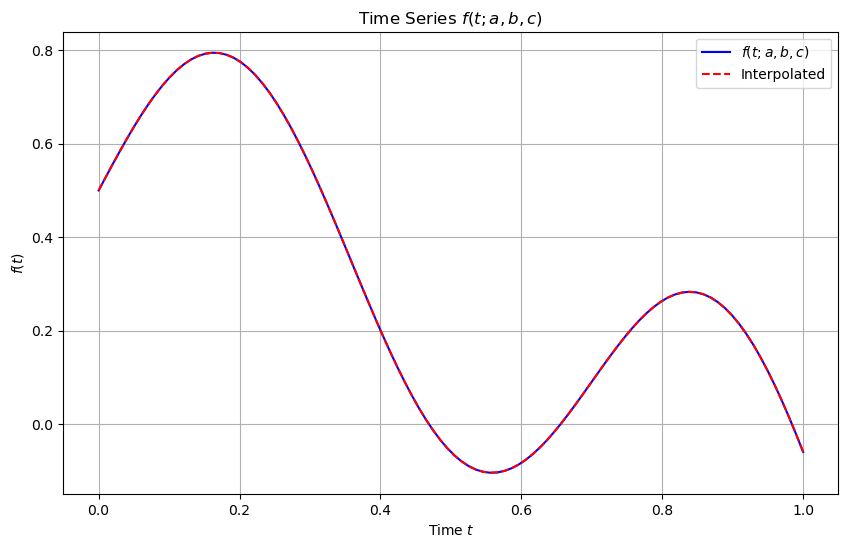

In [211]:
# We define the parameters as fixed values
a = 0.1
b = -0.13
c = 9

# We create an array of 100 t's between 0 and 1 (linear space)
t = np.linspace(0, 1, 100)

# We obtain the values of f(t) for the given parameters
f_values = f(t, a, b, c)

# We interpolate the values of f(t) using a linear interpolation
f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='cubic')

# We plot the values of f(t) and the interpolated function
plot_against_interpolation(a, b, c, f_interpolated(t), t=t)


## Question 4
Show the ratio of the interpolated values to true values accross the fine time grid.

What do you observe? Does it make sense?

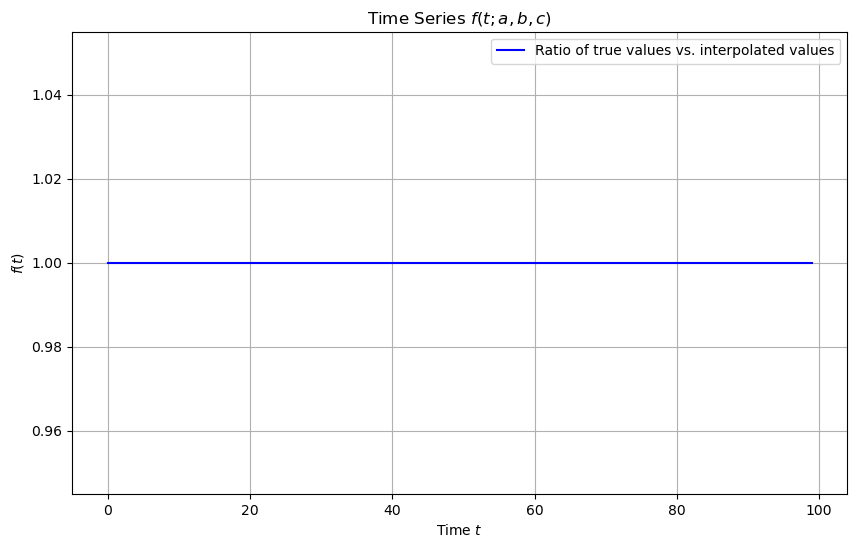

In [212]:
# Count how many f_values there are
n_values = len(f_values)
# Get the interpolated values for the same t's (but if there are more f_values, I want the interpolated values for more t's)
t_interpolated = np.linspace(0, 1, n_values)
f_interpolated_values = f_interpolated(t_interpolated)
# Calculate the ratio between the interpolated values and the real values
plot_ratio(f_values, f_interpolated_values)

*Come back to this question!!!*

## Question 5
Consider now all paramaters fixed except a and t.

We assume the parameter a can take values between 0 and 1.

Generate 10 samples of f (i.e., 10 time series) corresponding to linearly spaced values of a spanning the interval.

Store them in a pandas DataFrame and plot them with the plot method of the DataFrame.

<Axes: title={'center': 'Time Series $f(t; a, b, c)$'}, xlabel='t'>

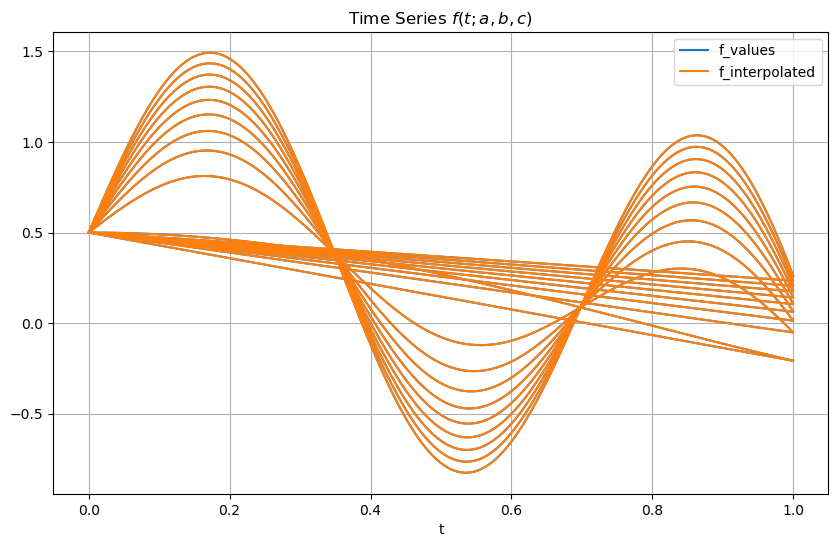

In [213]:
def interpolate_over_a(t, length_a=10):
    a = np.linspace(0, 1, length_a)
    values = pd.DataFrame({'a': [], 't': [], 'f_values': [], 'f_interpolated': []})
    # Iterate 10 times
    for i in range(length_a):
        f_values = f(t, a[i], b, c)
        f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='linear')
        # Construct a DataFrame with the values of a, t, f_values and f_interpolated
        df = pd.DataFrame({'a': [a[i]]*len(t), 't': t, 'f_values': f_values, 'f_interpolated': f_interpolated(t)})
        # Concatenate the new DataFrame with the previous values
        values = pd.concat([values, df], ignore_index=True)
    return values

t = np.linspace(0, 1, 10000)
values = interpolate_over_a(t)

# Plot the df using the plot method of pandas
values.plot(x='t', y=['f_values', 'f_interpolated'], title='Time Series $f(t; a, b, c)$', grid=True, figsize=(10, 6))


### Conclusion
The curve looks quite different for different a, but the interpolation is always super close.

## 6 Question
Create an interpolator that interpolates over a (same range as previous question) and returns the full time series (i.e., values of f for all time points) over the original time grid, i.e., t.


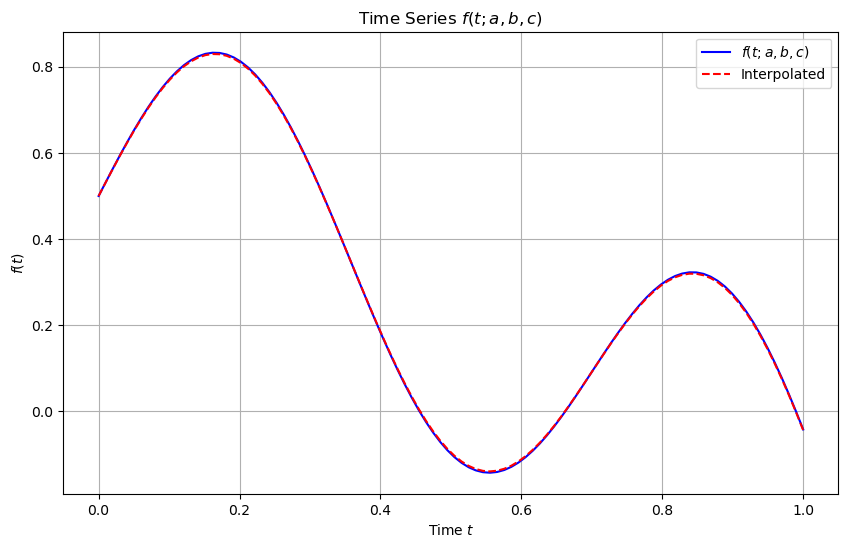

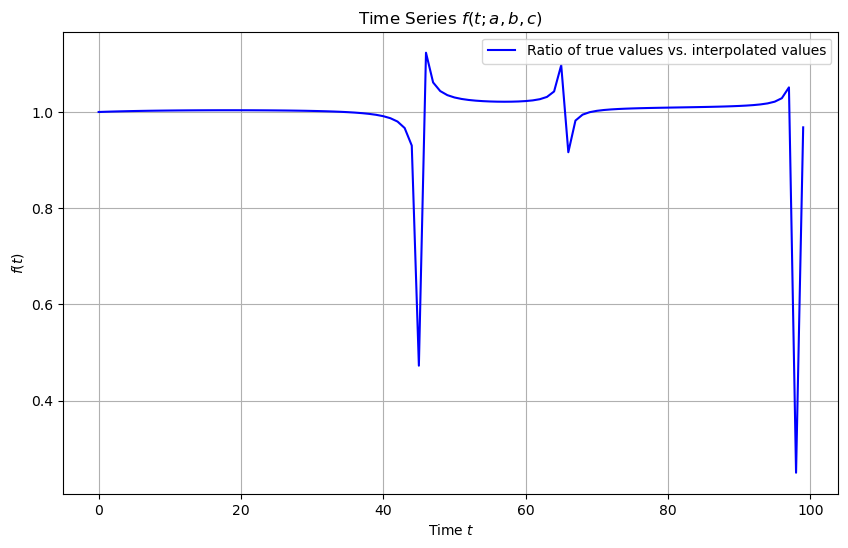

In [214]:
t = np.linspace(0, 1, 100)
a = np.linspace(0, 1, 10)
values = np.array([[f(t_val, a_val, b, c) for t_val in t] for a_val in a])

# Create the interpolator
f_interpolated = scipy.interpolate.RegularGridInterpolator((a, t), values)


def get_interpolated_values_given_a(a):
    # Obtain the points for a 
    points = np.array([[a, t_val] for t_val in t])

    # Obtain the interpolated values for a = 0.125 and all 100 t's.
    interpolated_values = f_interpolated(points)

    return interpolated_values

# Get the interpolated values for a = 0.125
a_fixed = 0.125
interpolated_values = get_interpolated_values_given_a(a_fixed)

# Plot the values of f(t) and the interpolated function
plot_against_interpolation(a_fixed, b, c, interpolated_values, t)

# Obtain the right true values
f_values = np.array([f(t_val, a_fixed, b, c) for t_val in t])
plot_ratio(f_values, interpolated_values)


**Conclusion:** For two dimensions, the fit is still pretty good.

## Question 7
Use widgets from ipywidgets to create a sliding scale of a values.

In this question, you should plot the ratio between the interpolated values and the true values of the function evaluated at the original time grid t.


In [215]:
# Create the interactive widget
def plot_interpolated_values(a):
    interpolated_values = get_interpolated_values_given_a(a)
    plot_against_interpolation(a, b, c, interpolated_values, t)
    f_values = np.array([f(t_val, a, b, c) for t_val in t])
    plot_ratio(f_values, interpolated_values)

# Create the interactive widget
interactive_plot = interactive(
    plot_interpolated_values,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1)
)

# Display the interactive plot
display(interactive_plot)


interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), Output()), _dom_classes=('w…

**Conclusion:** For some a, the interpolation is very good, while for some it is very bad. E.g., for a = 0.03 it's pretty bad, but it is quite good for e.g. a = 0.83, and perfect for a = 1. Evidently, the goodness of fit seems to increase in a.

## Question 8
*From your results of Question 7, what do you observe? Does it make sense?*

We observe, that at a=1, the interpolation is perfect. This makes sense when we examine our function:

$$
f(t, a, b, c) = \sqrt{a} \cdot e^{-b \cdot t} \cdot \sin(c \cdot t) + 0.5 \cdot \cos(2 \cdot t)
$$

The higher our alpha becomes, the better behaved is our function. Therefore, the interpolation is better for higher a.

## Question 9
We will now consider both a and b as interpolation parameters.

Our interpolator should therefore interpolate accross both a and b ranges.

Generate $10^2$ parameter value pairs $(a,b)$ in the range $ 0 < a < 1$ and $-0.5 < b < 0.5$ using latin hyper cube sampling.

Show the a and b samples as a 2D scatter plot.

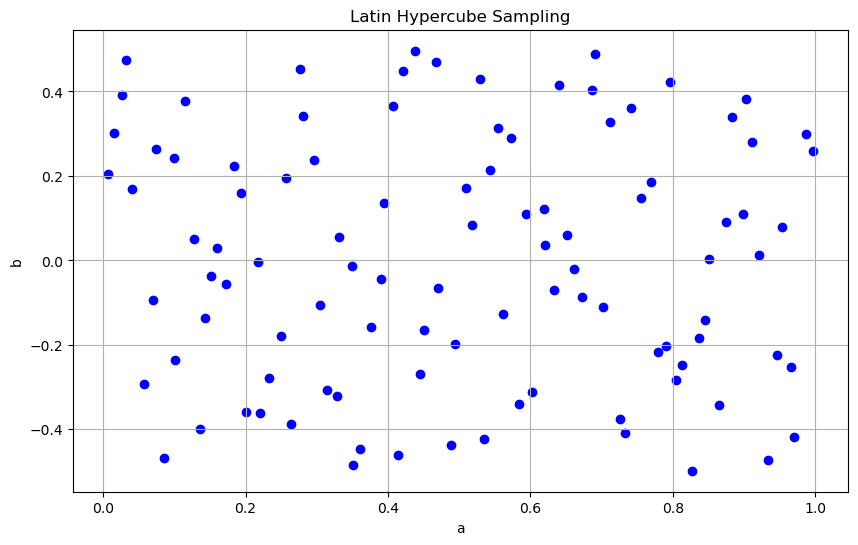

In [216]:
# Create a Latin Hypercube sampler instance
sampler = scipy.stats.qmc.LatinHypercube(d=2)

# Generate 100 random samples
sample = sampler.random(100)

# Define the lower and upper bounds for the parameters
lower_bounds = [0, -0.5]
upper_bounds = [1, 0.5]

# Scale the samples to the desired range
sample_scaled = scipy.stats.qmc.scale(sample, lower_bounds, upper_bounds)

# Show the a and b samples as a 2D scatter plot.
def scatter_plot(sample_scaled, title="Latin Hypercube Sampling"):
    plt.figure(figsize=(10, 6))
    plt.scatter(sample_scaled[:, 0], sample_scaled[:, 1], color='blue')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title(title)
    plt.grid(True)
    plt.show()

scatter_plot(sample_scaled)

## Question 10

For comparison, on the same plot, add a uniformly sampled realization of $10^2$ $a$ and $b$ values.

Can you distinguish by eye?

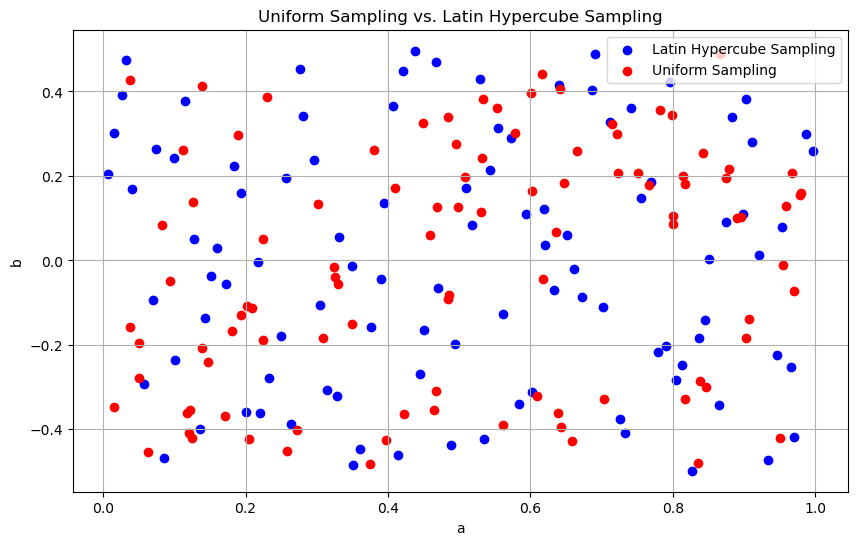

In [217]:
# Sample 100 a values using a uniform distribution
a = np.random.uniform(0, 1, 100)
b = np.random.uniform(-0.5, 0.5, 100)

# Create the combinations (a, b) for the uninformed samples (matching i = 1 in a to i = 1 in b)
uninformed_samples = np.array([[a[i], b[i]] for i in range(len(a))])

title="Uniform Sampling vs. Latin Hypercube Sampling"
plt.figure(figsize=(10, 6))
plt.scatter(sample_scaled[:, 0], sample_scaled[:, 1], color='blue')
plt.scatter(uninformed_samples[:, 0], uninformed_samples[:, 1], color='red')
plt.xlabel('a')
plt.ylabel('b')
plt.title(title)
plt.legend(['Latin Hypercube Sampling', 'Uniform Sampling'])
plt.grid(True)
plt.show()


**Conclusion:** I can't really see a difference...

## Question 11
Create the interpolator over the parameter space $(a,b)$ interpolating over samples of the function evaluated at the original time grid $t$.

As you will realise, we are dealing with an irregular grid and need the `griddata` method.

In [221]:
parameter_space = sample_scaled.copy() # Latin Hypercube Sampling

def convert_parameter_space(parameter_space):
    t_values = np.linspace(0, 1, len(parameter_space))
    return [(a, b, t) for (a, b), t in zip(parameter_space, t_values)]

parameter_space = convert_parameter_space(parameter_space)
print(parameter_space)

# Fixed value of c
c_fixed = 0.9

# Calculate f(t, a, b, c_fixed) for each point in parameter_space
f_vals = [f(t, a, b, c=c_fixed) for a, b, t in parameter_space]

def interpolate_at_points(parameter_space):
    # Extract a, b, t values from parameter_space
    a_vals, b_vals, t_vals = zip(*parameter_space)
    
    # Perform interpolation using only the points in parameter_space
    interpolated_values = scipy.interpolate.griddata(
        points=(a_vals, b_vals, t_vals),
        values=f_vals,
        xi=parameter_space,
        method='linear'
    )
    
    return interpolated_values

interpolated_values = interpolate_at_points(parameter_space)
print(interpolated_values)
print(f_vals)

[(0.35022560484943605, -0.48420012726466916, 0.0), (0.5186372680287091, 0.08284598249015929, 0.010101010101010102), (0.2811296853409792, 0.34272467012743457, 0.020202020202020204), (0.9030286442112212, 0.3817037814666048, 0.030303030303030304), (0.18400153639249298, 0.22255067874008216, 0.04040404040404041), (0.16020614276299328, 0.028904833450101086, 0.05050505050505051), (0.2758137970094168, 0.4539009596992669, 0.06060606060606061), (0.13584042251099568, -0.39974983553380355, 0.07070707070707072), (0.45101959392762436, -0.16547872249950635, 0.08080808080808081), (0.6904245638787109, 0.4889461262252969, 0.09090909090909091), (0.26388420307854177, -0.38622316588849004, 0.10101010101010102), (0.9107309919684344, 0.2799580061930683, 0.11111111111111112), (0.9866695258710186, 0.2981700067234919, 0.12121212121212122), (0.5344892498451272, -0.42212787714142586, 0.13131313131313133), (0.22043646210448112, -0.3614041898319499, 0.14141414141414144), (0.32885340127169516, -0.3220935388820758, 0